In [1]:
import eikon as ek
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import display, HTML
import os
# from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tools.tools import add_constant
import seaborn as sns
from scipy import stats
import time

In [2]:
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [3]:
%run paths.ipynb

In [4]:
%run funcs.ipynb

In [5]:
file = 'Developed_5_Factors_Daily.csv'

In [6]:
path_apikeys

'C:\\Users\\serge\\OneDrive\\Documents'

In [7]:
eikon_api = Eikon()


In [ ]:
load_data = False

In [8]:
indices_rics = ['LVMH.PA', 'ASML.AS', 'NESN.S', 'LIN',
                'NOVOb.CO', 'AAPL.O', 'ROG.S', 'UNH',
                'SAPG.DE', 'MSFT.O']
# indices_rics = eikon_api.get_index_constituents(ek, '.GDAXI')
# indices_rics

In [9]:
# end_row = 402
fm = FamaFrenchFactors()
df_factors = fm.get_data(file)

In [10]:
df_factors.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF
2023-04-24,0.0014,-0.0004,0.0021,0.0018,0.0029,0.0002
2023-04-25,-0.0138,0.0000,0.0012,0.0015,0.0061,0.0002
2023-04-26,-0.0038,0.0003,-0.0025,0.0014,-0.0002,0.0002
2023-04-27,0.0123,-0.0062,-0.0044,0.0023,-0.0033,0.0002
2023-04-28,0.0056,0.0001,0.0002,0.0012,0.0009,0.0002


In [11]:
# for f in df_factors.columns:
#     plot_acf(df_factors[f])
#     plt.show()

In [12]:
params = {
    'SDate':'1999-12-31',
    'EDate': '2021-06-04',
    'Curn':'Native',
}

if load_data:
    eikon_api.get_timeseries(rics=indices_rics, params=params)
    price_data = eikon_api.data
    price.to_csv(fr'{data_path}\reuters_sample_data.csv')    
else:
    price_data = pd.read_csv(fr'{data_path}\reuters_sample_data.csv')
    

LVMH.PA
Done
ASML.AS
Done
NESN.S
Done
LIN
Done
NOVOb.CO
Done
AAPL.O


2023-06-16 17:27:47,580 P[10768] [MainThread 15672] Error code 504 | Server Error: {"code":504,"message":"A remote server did not reply in a timely fashion. Please refer to the Data API Proxy logs for further details.","statusMessage":"Gateway Timeout"}
2023-06-16 17:27:47,581 P[10768] [MainThread 15672] HTTP request failed: EikonError-Server Error: {"code":504,"message":"A remote server did not reply in a timely fashion. Please refer to the Data API Proxy logs for further details.","statusMessage":"Gateway Timeout"}


Error code 504 | Server Error: {"code":504,"message":"A remote server did not reply in a timely fashion. Please refer to the Data API Proxy logs for further details.","statusMessage":"Gateway Timeout"}
ROG.S
Done
UNH
Done
SAPG.DE
Done
MSFT.O


2023-06-16 17:30:21,706 P[10768] [MainThread 15672] Error code 504 | Server Error: {"code":504,"message":"A remote server did not reply in a timely fashion. Please refer to the Data API Proxy logs for further details.","statusMessage":"Gateway Timeout"}
2023-06-16 17:30:21,707 P[10768] [MainThread 15672] HTTP request failed: EikonError-Server Error: {"code":504,"message":"A remote server did not reply in a timely fashion. Please refer to the Data API Proxy logs for further details.","statusMessage":"Gateway Timeout"}
C:\Users\serge\anaconda3\envs\volatilityModels\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


Error code 504 | Server Error: {"code":504,"message":"A remote server did not reply in a timely fashion. Please refer to the Data API Proxy logs for further details.","statusMessage":"Gateway Timeout"}


,0
LVMH.PA,Instrument Price Close Calc Date Month...
ASML.AS,Instrument Price Close Calc Date Month...
NESN.S,Instrument Price Close Calc Date Month...
LIN,Instrument Price Close Calc Date Month...
NOVOb.CO,Instrument Price Close Calc Date Month...
ROG.S,Instrument Price Close Calc Date Month...
UNH,Instrument Price Close Calc Date Month...
SAPG.DE,Instrument Price Close Calc Date Month...


In [19]:
df = pd.DataFrame(index=eikon_api.data.iloc[0].values[0]['Calc Date'], columns=indices_rics)

In [23]:
eikon_api.data.iloc[0].values[0]

,Instrument,Price Close,Calc Date,Month,Year,DailyLogReturns
0,LVMH.PA,80.028958,2000-01-03,1,2000,<NA>
1,LVMH.PA,72.458651,2000-01-04,1,2000,-0.099372
2,LVMH.PA,70.007313,2000-01-05,1,2000,-0.034416
3,LVMH.PA,69.214234,2000-01-06,1,2000,-0.011393
4,LVMH.PA,69.214234,2000-01-07,1,2000,0.0
...,...,...,...,...,...,...
5473,LVMH.PA,652.0,2021-05-31,5,2021,-0.005811
5474,LVMH.PA,657.1,2021-06-01,6,2021,0.007792
5475,LVMH.PA,661.0,2021-06-02,6,2021,0.005918
5476,LVMH.PA,654.3,2021-06-03,6,2021,-0.010188


In [29]:
df = eikon_api.data.iloc[0].values[0][['Calc Date', 'DailyLogReturns']]
df = df.rename({'DailyLogReturns': 0})
for i in range(1, len(eikon_api.data)):
    df2 = eikon_api.data.iloc[i].values[0][['Calc Date', 'DailyLogReturns']]
    df2 = df2.rename({'DailyLogReturns': i})
    df = pd.merge(df, df2, on='Calc Date')


C:\Users\serge\AppData\Local\Temp\ipykernel_10768\834411842.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'DailyLogReturns_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df2, on='Calc Date')


,Calc Date,DailyLogReturns_x,DailyLogReturns_y,DailyLogReturns_x,DailyLogReturns_y,DailyLogReturns_x,DailyLogReturns_y,DailyLogReturns_x,DailyLogReturns_y
0,2000-01-04,-0.099372,-0.049205,<NA>,-0.017722,-0.020305,<NA>,-0.012873,-0.048639
1,2000-01-05,-0.034416,-0.100228,-0.007168,0.017722,-0.023872,-0.025162,-0.002358,-0.128605
2,2000-01-06,-0.011393,-0.072511,0.04088,0.071416,0.023872,0.010141,0.035946,0.031926
3,2000-01-07,0.0,0.072004,0.019491,0.001168,0.020305,0.05507,0.110926,0.192664
4,2000-01-10,0.041322,0.069534,-0.010211,0.001166,0.072671,0.012128,-0.017481,0.040036
...,...,...,...,...,...,...,...,...,...
5194,2021-05-28,0.011348,0.015142,0.004691,-0.000599,0.003217,0.007793,-0.001892,0.010479
5195,2021-06-01,0.007792,0.007102,0.000722,0.005507,0.000519,-0.00032,-0.012704,0.003517
5196,2021-06-02,0.005918,0.007232,0.006658,-0.007905,-0.000727,-0.00048,-0.002141,0.001754
5197,2021-06-03,-0.010188,-0.010322,0.002686,-0.005216,0.011981,0.01114,0.005185,-0.005448


In [31]:
df.set_index('Calc Date', inplace=True)

<AxesSubplot:xlabel='Calc Date'>

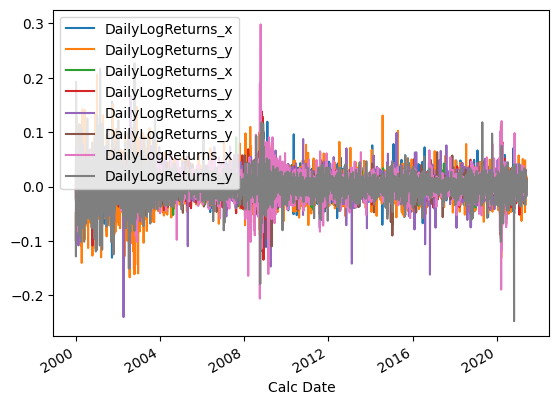

In [32]:
df.plot()

In [13]:
price_data = eikon_api.data
price.to_csv(fr'{data_path}\reuters_sample_data.csv')    

In [14]:
ric = indices_rics[1]
print(ric)
df = data_dict[ric]
df = pd.merge(df, df_factors, left_on='Calc Date', right_index=True, how='left')
df.head()

ASML.AS


NameError: name 'data_dict' is not defined

In [ ]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
for f in factors:
    print(f"{f}: {df.loc[:, ['DailyLogReturns', f]].iloc[0,1]}")

In [ ]:
X = df.loc[:, factors].astype(float)
X = add_constant(X)
y = df.loc[:, 'DailyLogReturns'].astype(float)

In [ ]:
model = OLS(
    endog=y,
    exog=X,
    missing='drop',
    hasconst=True,
)
results = model.fit()

In [ ]:
results.params

In [ ]:
results.pvalues

In [ ]:
sns.histplot(y)

In [ ]:
sns.histplot(results.resid)

In [ ]:
stats.kstat(results.resid)

In [ ]:
stats.jarque_bera(results.resid)

In [ ]:
model_roll = RollingOLS(
    endog=y,
    exog=X,
    missing='drop',
    window=1500 # this is approx. 5 years
)
results_roll = model_roll.fit()

In [ ]:
results_roll.params.join(df['Calc Date']).set_index('Calc Date').plot()

In [ ]:
df